In [19]:
import os
import pandas as pd

ROOT = "data/"
df = pd.concat(
    objs = [
        pd.read_feather(ROOT + file)
        for file 
        in os.listdir(ROOT)
    ]
)
df["sentiment"] = df["rating"].apply(
    lambda rating: 1 if rating > 3 else 0 if rating < 3 else -1
)
df.query("sentiment != -1", inplace = True)
df.reset_index(drop = True, inplace = True)

In [20]:
df["sentiment"].value_counts()

sentiment
1    3445132
0     839397
Name: count, dtype: int64

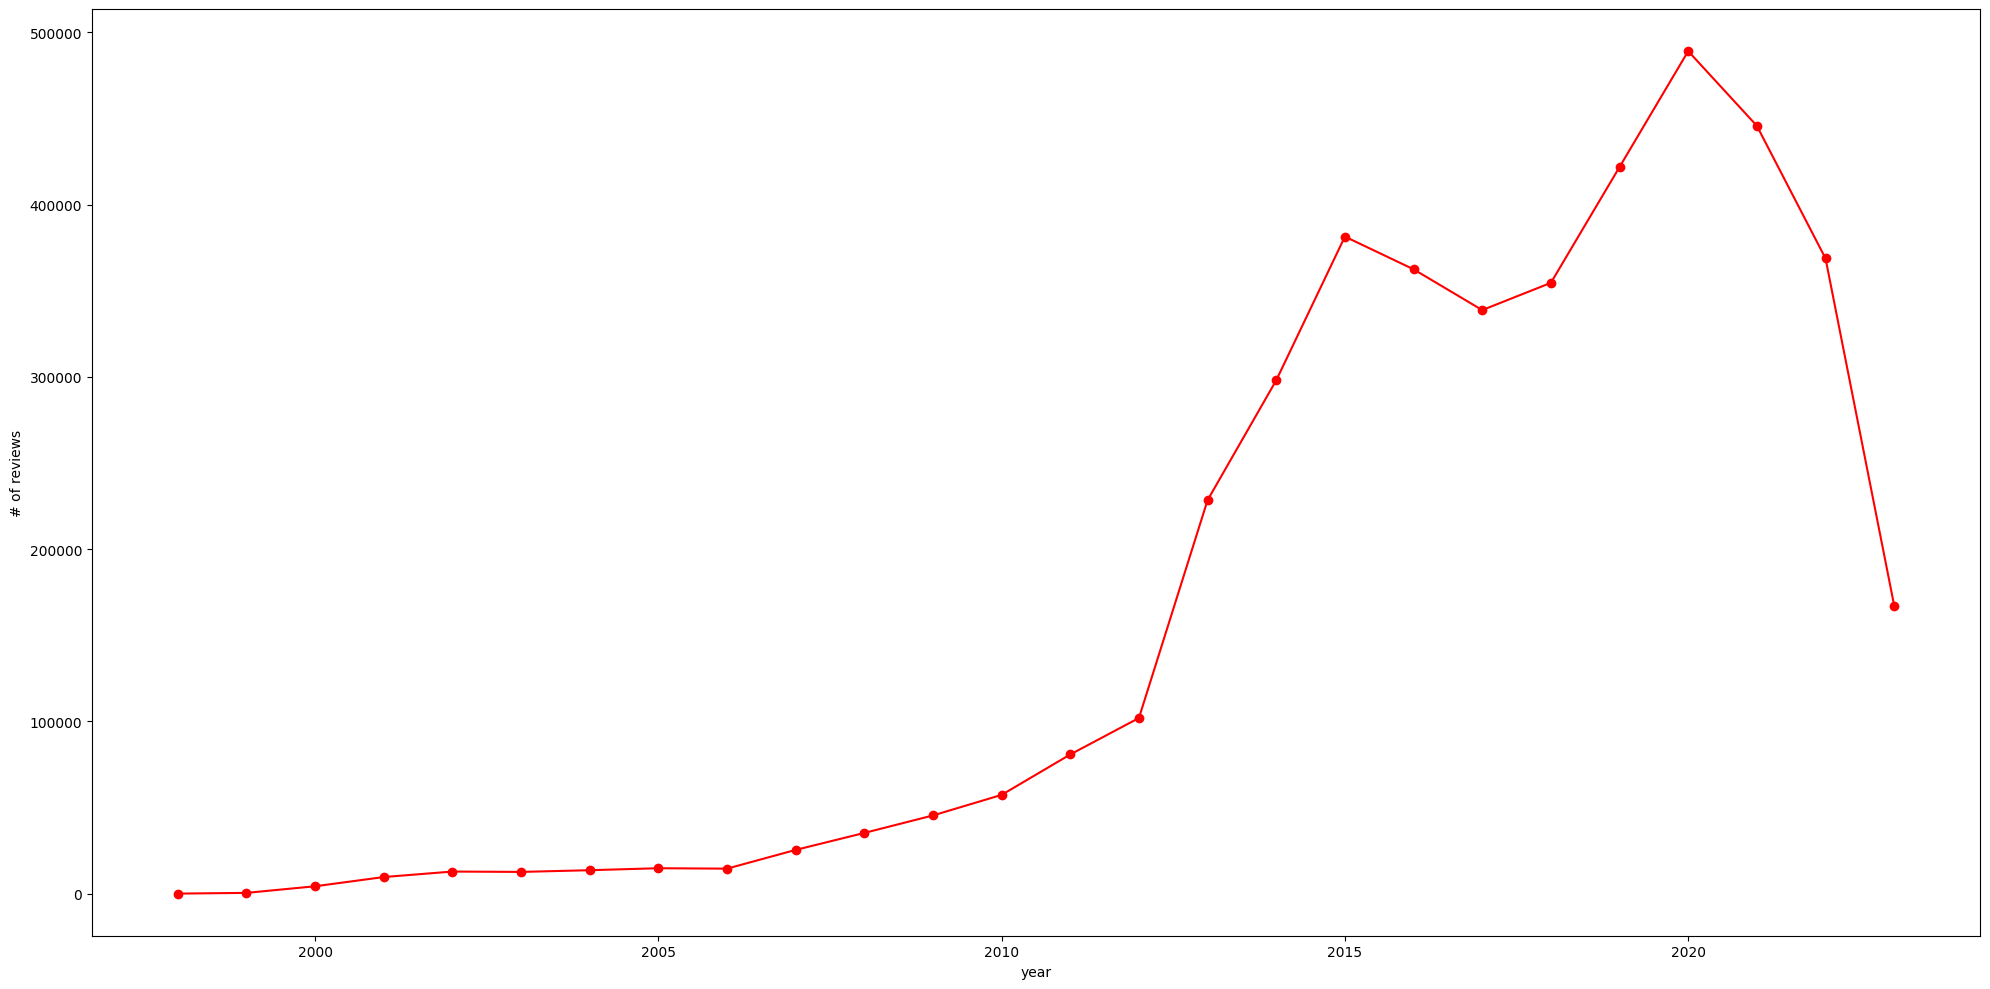

In [82]:
import matplotlib.pyplot as plt



visual_data = df["timestamp"].dt.year.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    color = "red"
)
plt.xlabel("year")
plt.ylabel("# of reviews")
plt.tight_layout()
plt.show()


In [ ]:
len(df.query("`timestamp`.dt.year <= 2019"))

0.6567342641396522

In [ ]:
len(df.query("`timestamp`.dt.year > 2019"))

0.34326573586034775

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_list
import string


train = df.query("`timestamp`.dt.year <= 2019")
test = df.query("`timestamp`.dt.year > 2019")
exclude_lists = list(stopwords_list) + list(string.punctuation)
count_vect = CountVectorizer(
    stop_words = exclude_lists,
    ngram_range=(2, 2),
)
X_train, X_test, y_train, y_test = (
    count_vect.fit_transform(train["text"].values),
    count_vect.transform(test["text"].values), 
    train["sentiment"].values, 
    test["sentiment"].values
)

c:\Users\luket\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


KeyboardInterrupt: 

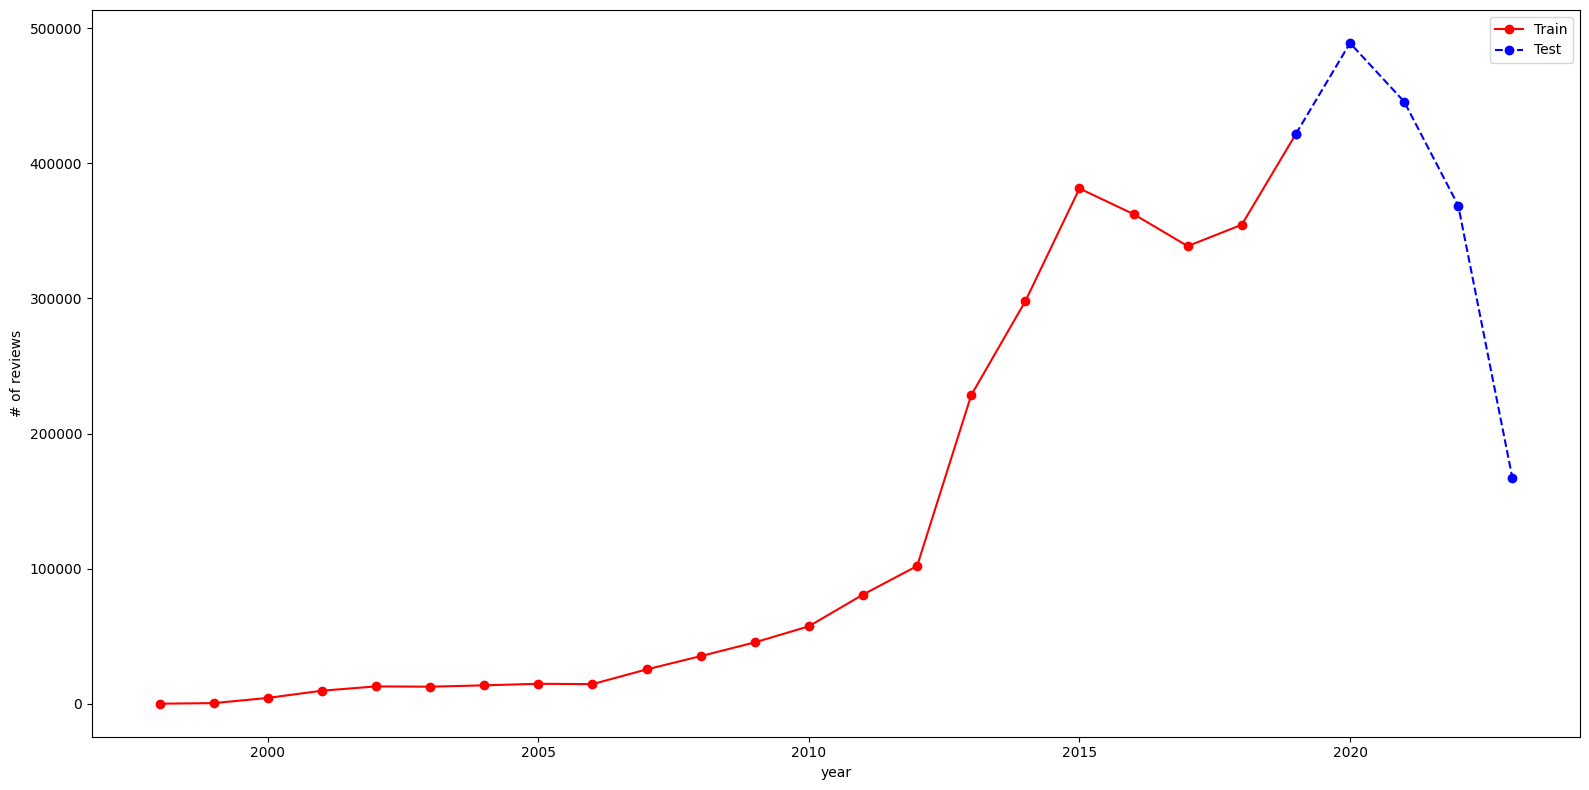

In [91]:
import matplotlib.pyplot as plt



visual_data = train["timestamp"].dt.year.value_counts().sort_index()
plt.figure(figsize=(16, 8))
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    color = "red",
    label = "Train"
)


visual_data = df.query("`timestamp`.dt.year >= 2019")["timestamp"].dt.year.value_counts().sort_index()
plt.plot(
    visual_data.index, 
    visual_data.values, 
    marker = "o",
    linestyle = "--",
    color = "blue",
    label = "Test"
)
plt.legend()
plt.xlabel("year")
plt.ylabel("# of reviews")
plt.tight_layout()
plt.show()


In [81]:
pd.DataFrame(
    X_test[:50].toarray(),
    columns=count_vect.get_feature_names_out()
).iloc[:20,-15:]

,𝐌𝐚𝐭𝐞𝐫𝐢𝐚𝐥,𝐍𝐎𝐓,𝐎𝐕𝐄𝐑𝐏𝐑𝐈𝐂𝐄𝐃,𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝,𝐖𝐨𝐮𝐥𝐝,𝐚𝐧𝐝,𝐚𝐰𝐟𝐮𝐥,𝐜𝐨𝐯𝐞𝐫𝐢𝐧𝐠,𝐞𝐚𝐫𝐩𝐚𝐝𝐬,𝐢𝐬,𝐣𝐮𝐬𝐭,𝐮𝐧𝐜𝐨𝐦𝐟𝐨𝐫𝐭𝐚𝐛𝐥𝐞,𝙰𝚖𝚊𝚣𝚘𝚗,𝙶𝚛𝚎𝚊𝚝,𝚌𝚘𝚟𝚎𝚛
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB().fit(X_train, y_train) 
clf.score(X_test, y_test)

0.8940405185989018

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)

<Figure size 1500x1000 with 0 Axes>

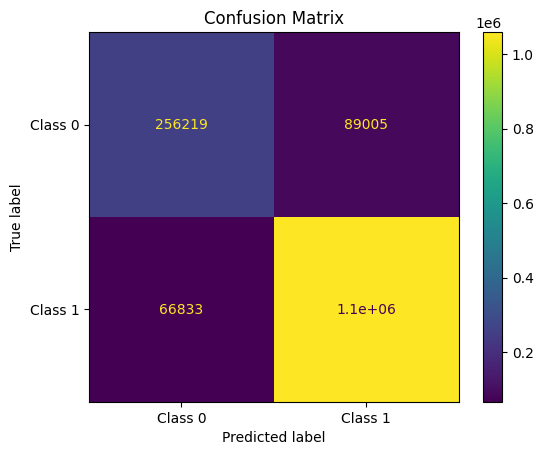

In [54]:
# Optional: Define class labels for the display
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm, 
    display_labels = [
        'Class 0', 
        'Class 1'
    ]
)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [57]:
confusion_matrix_dict = {
    label : value
    for label, value
    in zip(
        [
            "TN",
            "FP",
            "FN",
            "TP"
        ],
        cm.ravel()
    )
}

In [58]:
def calc_true_positive_rate(confusion_matrix_dict:dict) -> float:
    return confusion_matrix_dict["TP"]/(confusion_matrix_dict["TP"] + confusion_matrix_dict["FN"])


def calc_true_negative_rate(confusion_matrix_dict:dict) -> float:
    return confusion_matrix_dict["TN"]/(confusion_matrix_dict["TN"] + confusion_matrix_dict["FP"])

In [59]:
true_positive_rate_entropy = calc_true_positive_rate(confusion_matrix_dict)
print(f"True Positive Rate: {round(true_positive_rate_entropy,4)}")

true_negative_rate_entropy = calc_true_negative_rate(confusion_matrix_dict)
print(f"True Negative Rate: {round(true_negative_rate_entropy,4)}")

True Positive Rate: 0.9406
True Negative Rate: 0.7422


In [95]:
train["sentiment"].value_counts()/len(train)

sentiment
1    0.824375
0    0.175625
Name: count, dtype: float64

In [97]:
from sklearn.naive_bayes import ComplementNB


clf = ComplementNB().fit(X_train, y_train) 
clf.score(X_test.toarray(), y_test)

MemoryError: Unable to allocate 3.56 TiB for an array with shape (1470732, 332292) and data type int64

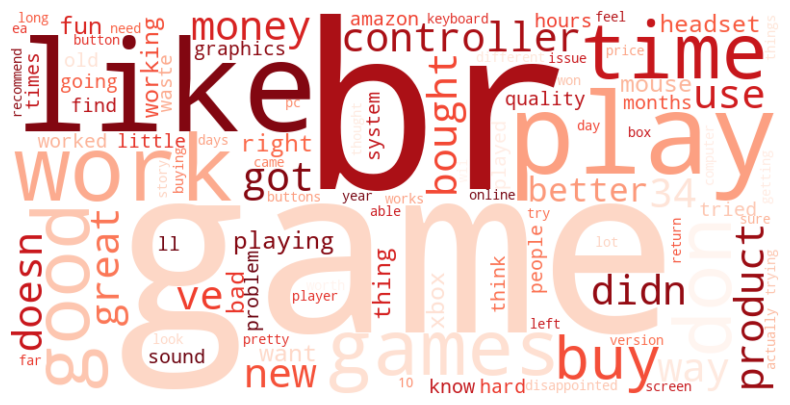

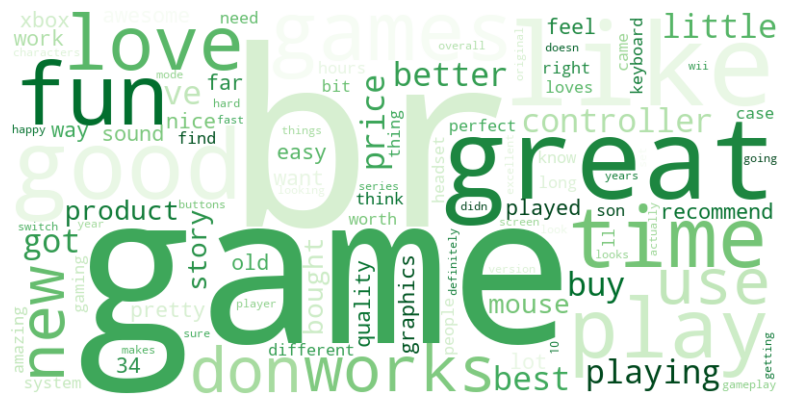

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


log_probabilities = clf.feature_log_prob_
feature_names = count_vect.get_feature_names_out()

for sentiment, color in zip([0, 1], ["Reds", "Greens"]):
    log_probabilities_sentiment = sorted(log_probabilities[sentiment,:])[::-1]
    features_sentiments = [feature_names[i] for i in log_probabilities[sentiment,:].argsort()[::-1]]
    
    # Create a WordCloud object with desired parameters
    wordcloud = WordCloud(
        width = 800, 
        height = 400, 
        background_color = "white",
        max_words = 100,
        colormap = color
    ).generate_from_frequencies(
        {
            feature: prob  
            for feature, prob 
            in zip(features_sentiments, log_probabilities_sentiment)
        }
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off") # Turn off the axis labels and ticks
    plt.show()
    